___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Visualizing Time Series Data

Let's go through a few key points of creating nice time series visualizations!

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/starbucks.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [4]:
# To show that dates are already parsed
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

First we'll create a line plot that puts both <tt>'Close'</tt> and <tt>'Volume'</tt> on the same graph.<br>Remember that we can use <tt>df.plot()</tt> in place of <tt>df.plot.line()</tt>

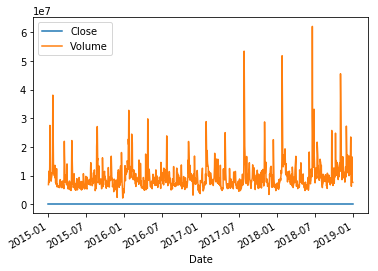

In [5]:
df.plot();

This isn't very helpful due to the difference in y-values, so we'll split them up.

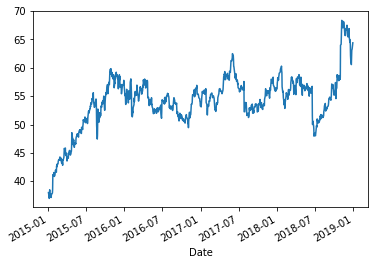

In [6]:
df['Close'].plot();

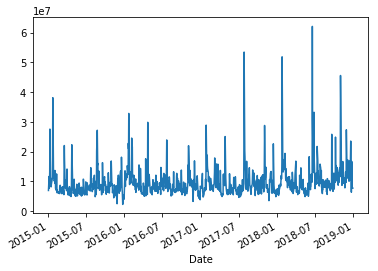

In [7]:
df['Volume'].plot();

# Plot Formatting

## Adding a title and axis labels

<div class="alert alert-info"><strong>NOTE:</strong> While we <em>can</em> pass a title into the pandas <tt>.plot()</tt> function, we can't pass x- and y-axis labels.<br>However, since <tt>.plot()</tt> returns a <tt>matplotlib.axes.AxesSubplot</tt> object, we can set the labels<br>on that object so long as we do it in the same jupyter cell. Setting an <tt>autoscale</tt> is done the same way.</div>

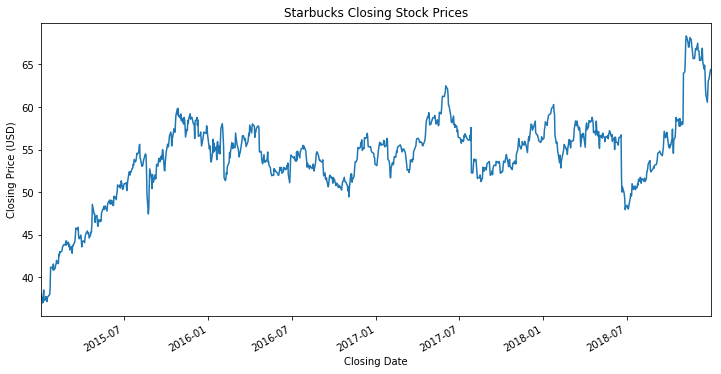

In [8]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

### Choosing X Limits by Slice:

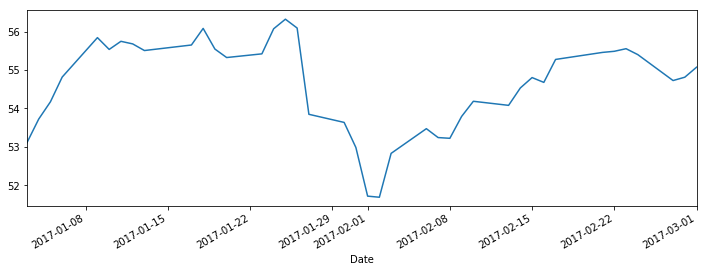

In [9]:
# Dates are separated by a colon:
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4)).autoscale(axis='x',tight=True);

### Choosing X Limits by Argument:

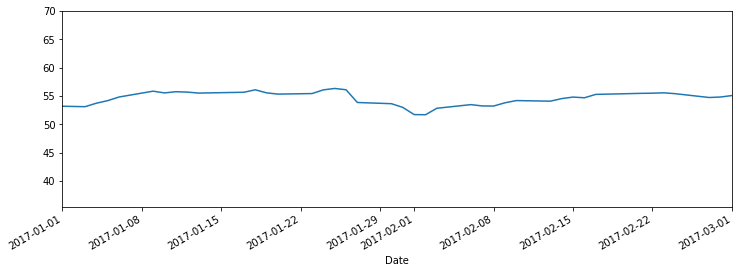

In [10]:
# Dates are separated by a comma:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

<div class="alert alert-info"><strong>NOTE:</strong> It's worth noting that the limit values do <em>not</em> have to appear in the index. Pandas will plot the actual dates based on their location in time.<br><br>Also, another advantage of slicing over arguments is that it's easier to include the upper/lower bound as a limit.<br>That is, <tt><font color=black>df['column']['2017-01-01':].plot()</font></tt> is easier to type than <tt><font color=black>df['column'].plot(xlim=('2017-01-01',df.index.max()))</font></tt></div>

Now let's focus on the y-axis limits to get a better sense of the shape of the data.<br>First we'll find out what upper and lower limits to use.

In [11]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

In [12]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].max()

56.3244

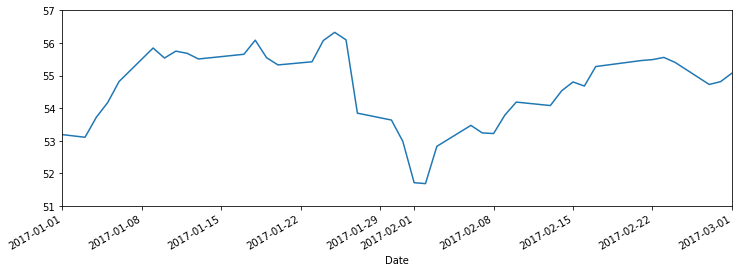

In [13]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57]);

<div class="alert alert-info"><strong>NOTE:</strong> Be careful when setting y-axis limits! Setting too narrow a slice can make graphs appear overly volatile. The above chart might lead you to believe that stocks were many times more valuable in January 2017 than in early February, but a look at them with the y-axis minimum set to zero tells a different story:</div>

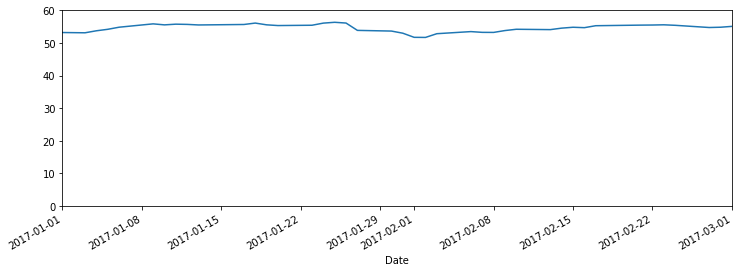

In [14]:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[0,60]);

## Title and axis labels
Let's add a title and axis labels to our subplot.
<div class="alert alert-info"><strong>REMEMBER:</strong> <tt><font color=black>ax.autoscale(axis='both',tight=True)</font></tt> is unnecessary if axis limits have been passed into <tt>.plot()</tt>.<br>
If we were to add it, autoscale would revert the axis limits to the full dataset.</div>

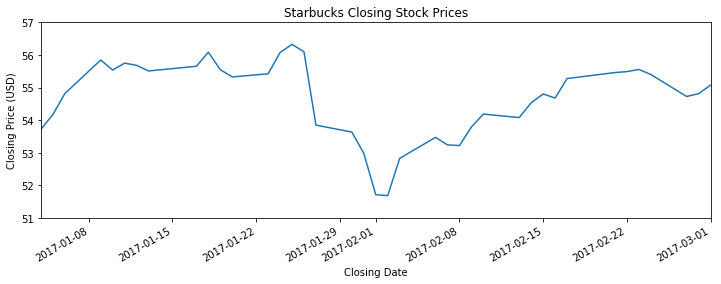

In [15]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(xlim=['2017-01-04','2017-03-01'],ylim=[51,57],figsize=(12,4),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Color and Style
We can pass arguments into <tt>.plot()</tt> to change the linestyle and color. Refer to the Customizing Plots lecture from the previous section for more options.

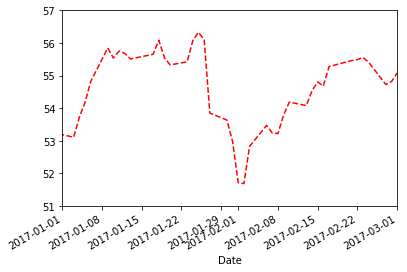

In [16]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');

## X Ticks
In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from <tt>matplotlib</tt> called <tt>dates</tt>.

In [17]:
from matplotlib import dates

### Set the spacing
The x-axis values can be divided into major and minor axes. For now, we'll work only with the major axis and learn how to set the spacing with <tt>.set_major_locator()</tt>.

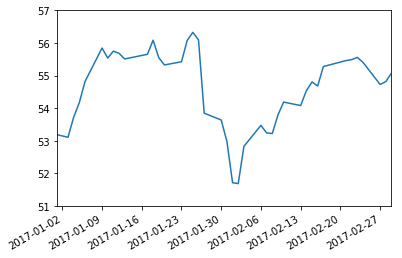

In [18]:
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57])

# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

Notice that dates are spaced one week apart. The dates themselves correspond with <tt>byweekday=0</tt>, or Mondays.<br>
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/api/dates_api.html#date-tickers</a>

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [19]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
from datetime import datetime
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

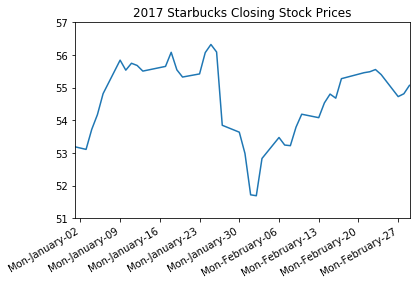

In [20]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

## Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

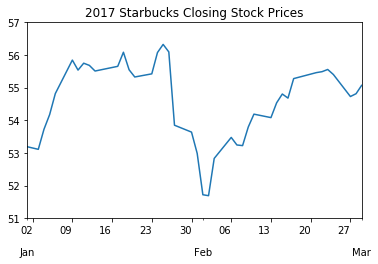

In [21]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

<font color=green><strong>NOTE: </strong>we passed a rotation argument <font color=black><strong>rot=0</strong></font> into <tt><font color=black>df.plot()</font></tt> so that the major axis values appear horizontal, not slanted.

## Adding Gridlines
We can add x and y axis gridlines that extend into the plot from each major tick mark.

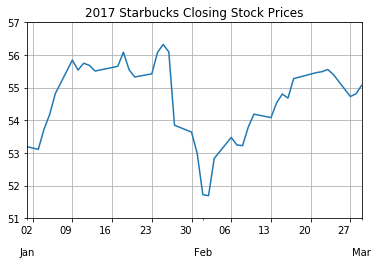

In [22]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

## Great job!